In [1]:
import pandas as pd
import numpy as np
#Plot Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Model Building
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
#Model Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load Dataset

In [2]:
data = pd.read_csv(r"E:\ExcelR Assignment\Assignment 16 - Neural Networks\forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Drop month and day as we already have one hot encoded values

In [3]:
data = data.drop(['month','day','daysun','monthdec'],axis=1)
data.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

## Data Analysis & Data Visualization

<AxesSubplot:xlabel='area', ylabel='Density'>

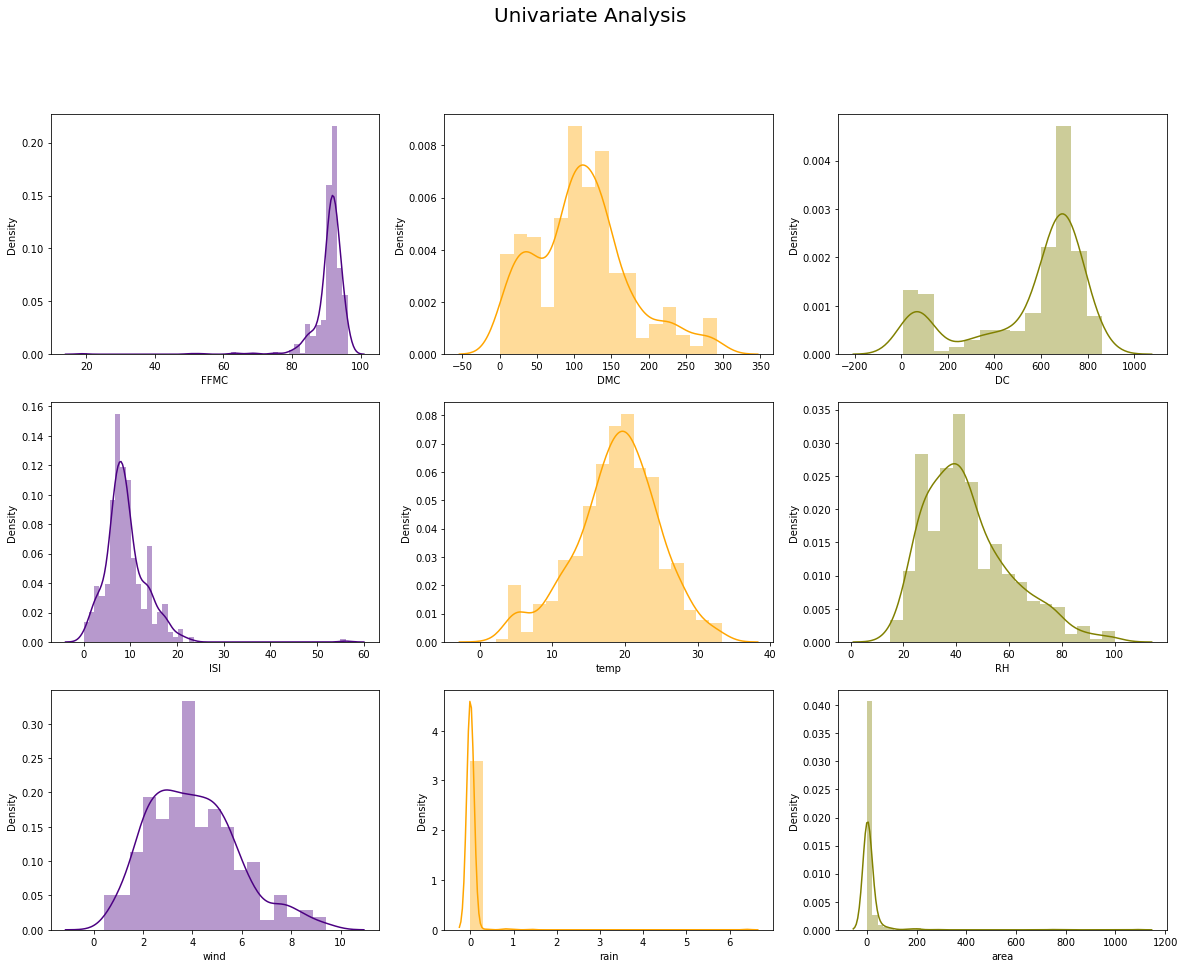

In [5]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['FFMC'],ax=axes[0,0],color='indigo')
sns.distplot(data['DMC'],ax=axes[0,1],color='orange')
sns.distplot(data['DC'],ax=axes[0,2],color='olive')
sns.distplot(data['ISI'],ax=axes[1,0],color='indigo')
sns.distplot(data['temp'],ax=axes[1,1],color='orange')
sns.distplot(data['RH'],ax=axes[1,2],color='olive')
sns.distplot(data['wind'],ax=axes[2,0],color='indigo')
sns.distplot(data['rain'],ax=axes[2,1],color='orange')
sns.distplot(data['area'],ax=axes[2,2],color='olive')

### Inferences:

1. Left Skewness :  DMC | ISI | RH | rain | area
2. Right Skewness : FFMC | DC  
3. temp | wind  seems to have normally distribution

In [6]:
label_encoder = LabelEncoder()
data['size_category'] = label_encoder.fit_transform(data['size_category'])
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


#### So small = 1 and large = 0 as per Label Encoding

## Splitting the variables

In [7]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]

In [8]:
data['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

## Up-sampling as the Target Variable is not balanced

In [9]:
from imblearn.combine import SMOTETomek
# Performing Oversampling method to handle imbalanced data

smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,Y)

In [10]:
(X.shape,Y.shape),(X_res.shape,y_res.shape)

(((517, 26), (517,)), ((746, 26), (746,)))

### Create Train & Validation Set

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=42,test_size=0.3)

### Standardizing the first few columns till area

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define Architecture

In [13]:
input_neurons = X_train.shape[1]
output_neurons = 1

In [14]:
Hidden_Layers = 2
hidden_layer_1 = 20
hidden_layer_2 = 8

In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=hidden_layer_1,activation='relu'))
model.add(Dense(units=hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## Train the model

In [18]:
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 95ms/step - loss: 1.0045 - accuracy: 0.5220 - val_loss: 0.9628 - val_accuracy: 0.4911
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.9270 - accuracy: 0.4860 - val_loss: 0.8644 - val_accuracy: 0.4554
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.8003 - accuracy: 0.5120 - val_loss: 0.8054 - val_accuracy: 0.4821
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.4931 - val_loss: 0.7667 - val_accuracy: 0.4732
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7253 - accuracy: 0.5052 - val_loss: 0.7413 - val_accuracy: 0.4955
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5467 - val_loss: 0.7191 - val_accuracy: 0.5312
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.5810 - val_loss: 0.7015 - val_accuracy: 0.5670
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1976 - accuracy: 0.9353 - val_loss: 0.3066 - val_accuracy: 0.9196
Epoch 60/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1754 - accuracy: 0.9699 - val_loss: 0.3027 - val_accuracy: 0.9196
Epoch 61/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.9463 - val_loss: 0.3033 - val_accuracy: 0.9196
Epoch 62/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.9455 - val_loss: 0.3025 - val_accuracy: 0.9107
Epoch 63/100
17/17 [==============================] - 0s 10ms/step - loss: 0.1855 - accuracy: 0.9532 - val_loss: 0.3003 - val_accuracy: 0.9107
Epoch 64/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1855 - accuracy: 0.9355 - val_loss: 0.2966 - val_accuracy: 0.9241
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9671 - val_loss: 0.2952 - val_accuracy: 0.9241
Epoch

## Evaluate Model Performance

#### Summarizing history for loss

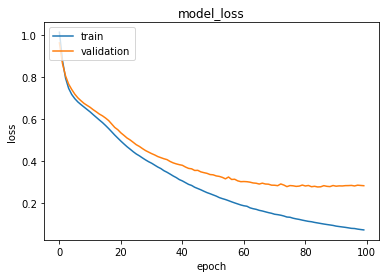

In [19]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

#### Summarizing history for accuracy

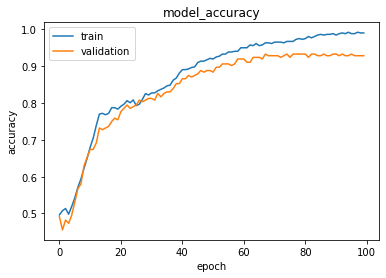

In [20]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

## Model Performance on Validation set

In [21]:
prediction = model.predict_classes(X_test)

In [22]:
accuracy_score(y_test,prediction)

0.9285714285714286

### So our model has good Test Accuracy